In [8]:
from GG_mthesis import *
%matplotlib inline

In [9]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')
sns.set(font_scale=1.2)

In [10]:
#define the path
path = '.\\data\\02_intermediate\\tsg_orchestra\\b1903933_2_QC.nc'

#open the dataset with the defined path
ds = xr.open_dataset(path) 

In [11]:
ds.time[:500]

<xarray.DataArray 'time' (time: 500)>
array(['2017-11-08T00:00:00.000000000', '2017-11-08T00:01:00.000000000',
       '2017-11-08T00:02:00.000000000', ..., '2017-11-08T08:16:59.999040000',
       '2017-11-08T08:17:59.999840000', '2017-11-08T08:19:00.000640000'],
      dtype='datetime64[ns]')
Coordinates:
    lat      (time) float64 ...
    lon      (time) float64 ...
    depth    (time) float32 ...
  * time     (time) datetime64[ns] 2017-11-08 ... 2017-11-08T08:19:00.000640
Attributes:
    long_name:            Chronological DateTime Date
    standard_name:        time
    ancillary_variables:  TIME_SEADATANET_QC
    axis:                 T
    valid_min:            0.0
    valid_max:            2500000.0
    sdn_parameter_urn:    SDN:P01::CJDY1101
    sdn_parameter_name:   DateTime (chronological)
    sdn_uom_name:         Days
    sdn_uom_urn:          SDN:P06::UTAA

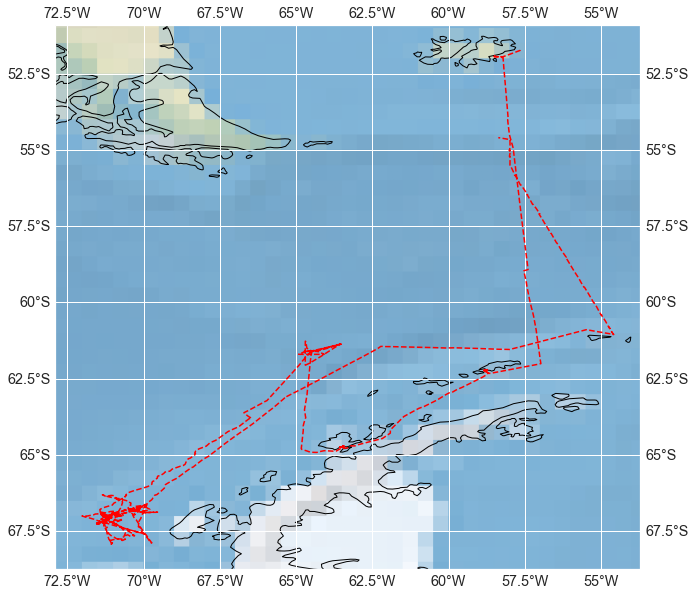

In [12]:
data.data_sel.cruise_map(ds.lon,ds.lat, savepath='C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\preprocessing\\cruise_path.png')

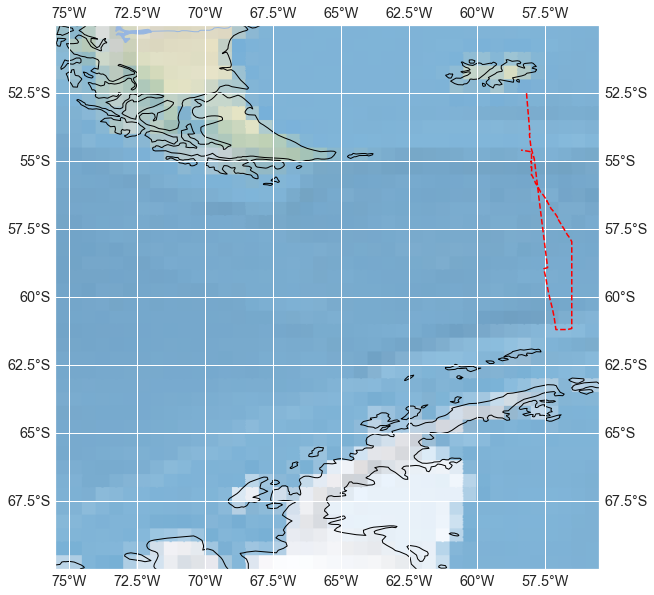

In [13]:
#I make a map with the geographical part of the cruise that I am interested in.
ds_select1_geo = data.data_sel.select_transect(ds,-58.5, -56.5, -61.2,-52.5)
data.data_sel.cruise_map(ds_select1_geo.lon,ds_select1_geo.lat,extent=[-75.5,-55.5,-70.0,-50.0],savepath='C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\preprocessing\\geo_select_path.png')

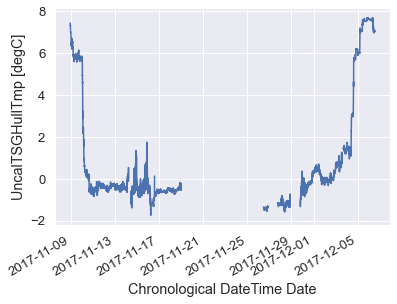

In [14]:
#To select the proper time period I have a look at the temperture data in a timeseries plot.
ds.temp_hull_1.plot()

In [15]:
ds_select = data.data_sel.select_transect(ds,-58.5, -56.5, -61.2,-52.5, '2017-11-08', '2017-11-15')

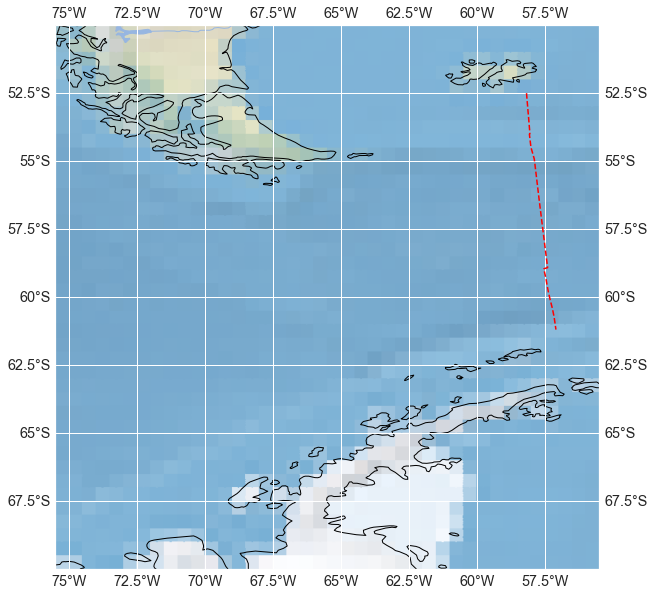

In [16]:
data.data_sel.cruise_map(ds_select.lon, ds_select.lat,extent=[-75.5,-55.5,-70.0,-50.0],savepath='C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\preprocessing\\cruise_select_path.png')

In [17]:
ds = ds_select

In [13]:
cond_tsg_nan = int(ds.conductivity_tsg.isnull().sum())
sal_tsg_cal_nan = int(ds.sal_tsg_cal.isnull().sum())
sal_tsg_nocal_nan = int(ds.sal_tsg_nocal.isnull().sum())
temp_hull_1_nan = int(ds.temp_hull_1.isnull().sum())
temp_hull_2_nan = int(ds.temp_hull_2.isnull().sum())
temp_cond_tsg_nan = int(ds.temp_cond_tsg.isnull().sum())

ds_nan_dict = {'cond_tsg_nan':cond_tsg_nan, 'sal_tsg_cal_nan':sal_tsg_cal_nan, 'sal_tsg_nocal_nan':sal_tsg_nocal_nan, 
               'temp_hull_1_nan':temp_hull_1_nan, 'temp_hull_2_nan':temp_hull_2_nan, 'temp_cond_tsg_nan':temp_cond_tsg_nan}

ds_nan_values = list(ds_nan_dict.values())

index = list(ds_nan_dict.keys())

In [14]:
pd.DataFrame(ds_nan_values,index=index,columns=['Number of NaN values'])

Number of NaN values
cond_tsg_nan                          0
sal_tsg_cal_nan                       0
sal_tsg_nocal_nan                     0
temp_hull_1_nan                       0
temp_hull_2_nan                       0
temp_cond_tsg_nan                     0

In [15]:
#STEPS EXPLAINED IN FULL PREPROCESSING

In [16]:
path_to = '.\\data\\02_intermediate\\tsg_orchestra\\b1903933_3_select.nc'
ds.to_netcdf(path_to)